**Análisis Exploratorio de Ventas - Walmart**

Este proyecto desarrolla un análisis exploratorio de datos (EDA) utilizando Python, tomando como referencia un dataset de ventas de Walmart. El objetivo es mostrar, de manera clara y didáctica, cómo realizar un análisis paso a paso: desde la carga y limpieza de los datos hasta la creación de visualizaciones que permitan identificar patrones y obtener conclusiones útiles.

**Estructura del Proyecto**

1. Descripción de la base de datos: contexto y variables incluidas.

2. Carga de datos: cómo importar el archivo en Python.

3. Lectura y exploración inicial: funciones básicas para familiarizarnos con el dataset.

4. Análisis inicial de datos (IDA): búsqueda de nulos, duplicados, tipos de datos y valores atípicos.

5. Análisis exploratorio (EDA): estadísticas descriptivas, gráficos y relaciones entre variables.

**Caso Práctico: Conjunto de datos de ventas de comercio electrónico en Walmart**

**1. Descripción del conjunto de datos**

Walmart es un gigante minorista reconocido mundialmente, famoso por ofrecer una amplia gama de productos a precios competitivos y brindar una experiencia de compra conveniente para millones de clientes en todo el mundo.

El análisis de este conjunto de datos ofrece información valiosa sobre la base de clientes y el comportamiento de compra de Walmart. Revela detalles sobre la demografía de los clientes, sus preferencias de productos y sus patrones de gasto. Este completo conjunto de datos es un recurso valioso para comprender diversos aspectos de las operaciones de Walmart, como las estrategias de marketing, la segmentación de clientes y la demanda de productos. Puede optimizar la toma de decisiones estratégicas en áreas como la gestión de inventario, el marketing dirigido y la gestión de las relaciones con los clientes.

**El conjunto de datos contiene las siguientes columnas:**

    User_ID: Identificador único del cliente
    Product_ID: Identificador único del producto comprado
    Gender: Sexo del usuario (M/F)
    Age: Edad del cliente
    Occupation : Código número de ocupación del cliente (0-20)
    City_Category: Categoría de la ciudad donde reside el cliente (A,B o C)
    StayInCurrentCityYears : Número de años de estancia en la ciudad actual (0, 1, 2, 3, 4 +)
    Marital_Status: Estado civil, 0 = soltero, 1 = casado
    ProductCategory: Categoría de producto (código del 1 al 20)
    Purchase: Monto de la compra (variable común)



Los datos para el Análisis Exploratorio fueron tomados de:
https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset/code

**2. Cargar el dataset**

Se carga el conjunto de datos.

In [ ]:
from google.colab import files

**Importar librerías necesarias**

En esta sección se importan las librerías necesarias para el análisis de datos en Python.  
Se incluyen paquetes para manipulación de datos (**pandas**, **numpy**), visualización (**matplotlib**, **seaborn**) y análisis estadístico.  
Estas librerías proporcionan las herramientas fundamentales para la exploración, limpieza y representación de los datos.  

In [ ]:
import os                                   # manipular rutas de archivos
import zipfile                              # trabajar con archivos ZIP
import io                                   # buffers de texto
from datetime import datetime               # manejo de fechas
import pandas as pd                         # manipulación de tablas
import numpy as np                          # operaciones numéricas
import matplotlib.pyplot as plt             # gráficos básicos
import seaborn as sns                       # gráficos estadísticos
from IPython.display import display, Markdown # mostrar Markdown en notebook

# cargar el dataframe
df = cargar_dataset(dataset_path)                      # cargar dataset en df
print("Dimensiones del dataset:", df.shape)            # filas y columnas

# mostrar primeras 5 filas
display(Markdown("### Primeras filas del dataset"))
display(df.head(5))

Dimensiones del dataset: (550068, 10)


### Primeras filas del dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


**3. Exploración inicial (IDA)**

En esta etapa se realiza una exploración inicial del dataset. El propósito es comprender la estructura general de los datos: número de filas y columnas, nombres de variables, tipos de datos y primeras observaciones. Este análisis preliminar permite identificar valores nulos, inconsistencias en los registros y características relevantes de las variables, que servirán de base para los análisis posteriores.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB



### Estadísticas básicas (numéricas)

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### Resumen general (incluye categóricas)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### Valores faltantes por columna

,n_nulos,pct_nulos
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category,0,0.0
Purchase,0,0.0


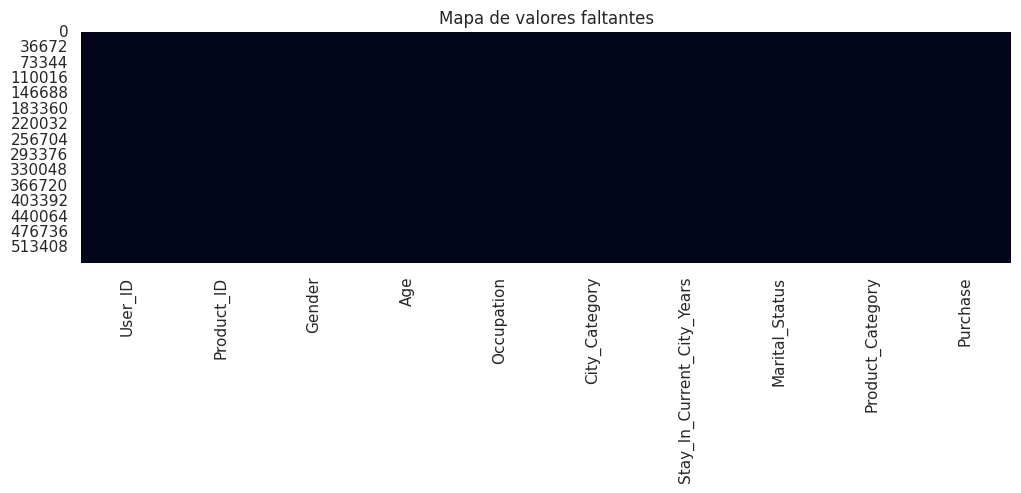

In [ ]:
# ver información general (tipos y nulos)
buffer = io.StringIO()                                 # buffer para capturar info
df.info(buf=buffer)                                    # info del DF
print(buffer.getvalue())                               # imprimir info

# estadísticas numéricas básicas
display(Markdown("### Estadísticas básicas (numéricas)"))
display(df.describe().T)                               # describe columnas numéricas

# estadísticas generales para todas las columnas
display(Markdown("### Resumen general (incluye categóricas)"))
display(df.describe(include='all').T)                  # describe todas

# contar valores nulos y porcentaje por columna
n_nulos = df.isnull().sum()                            # conteo nulos
pct_nulos = (n_nulos / len(df) * 100).round(2)         # % de nulos
nulos_tabla = pd.concat([n_nulos, pct_nulos], axis=1)  # combinar
nulos_tabla.columns = ['n_nulos','pct_nulos']          # renombrar columnas
display(Markdown("### Valores faltantes por columna"))
display(nulos_tabla.sort_values('n_nulos', ascending=False))  # mostrar ordenado

# mapa visual de nulos para ver distribución
plt.figure(figsize=(12,3))
sns.heatmap(df.isnull(), cbar=False)                   # heatmap de nulos
plt.title('Mapa de valores faltantes')                 # título gráfico
plt.show()                                             # mostrar gráfico

**Mapa de valores faltantes**: El gráfico muestra la presencia de valores nulos en las distintas variables del dataset. Cada columna representa una variable y cada fila un registro. En este caso, no se observan celdas iluminadas, lo que indica que no existen valores faltantes en los datos analizados.


**4. Preparación: Nombres y Tipos de variables**




In [ ]:
# limpiar espacios en nombres de columnas
df.columns = df.columns.str.strip()                     # eliminar espacios en cabeceras

# convertir columnas que suelen ser categóricas a tipo 'category' si existen
for col in ['Gender','Age','City_Category','StayInCurrentCityYears','Marital_Status']:
    if col in df.columns:
        try:
            df[col] = df[col].astype('category')       # convertir a categoría
        except Exception:
            pass                                       # si falla, continuar sin romper

# convertir columnas numéricas que podrían estar en text a números
for col in ['Purchase','Occupation','Product_Category']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # coerción segura a numeric

# mostrar tipos actualizados
display(Markdown("### Tipos después de un primer ajuste"))
display(df.dtypes)                                     # mostrar tipos de columnas

### Tipos después de un primer ajuste

,0
User_ID,int64
Product_ID,object
Gender,category
Age,category
Occupation,int64
City_Category,category
Stay_In_Current_City_Years,object
Marital_Status,category
Product_Category,int64
Purchase,int64


**Tipos de variables después del ajuste**
La tabla muestra los tipos de datos asignados a cada columna del dataset tras la limpieza inicial. Se observa que variables como `Gender`, `Age`, `City_Category` y `Marital_Status` fueron convertidas a tipo categórico, mientras que `User_ID`, `Occupation`, `Product_Category` y `Purchase` quedaron como numéricas. Este ajuste asegura que cada variable tenga un tipo de dato coherente con su naturaleza para facilitar los análisis posteriores.

**5. Manejo de datos faltantes**



In [ ]:
# lista de columnas con nulos
cols_con_nulos = df.columns[df.isnull().any()].tolist() # columnas con algún nulo
print("Columnas con valores faltantes:", cols_con_nulos) # imprimir lista

# regla simple de imputación:
# - si columna numérica -> imputar con mediana
# - si columna categórica -> imputar con moda
df_proc = df.copy()                                     # copia para limpiar sin perder original
for col in cols_con_nulos:
    n = df_proc[col].isnull().sum()                     # número de nulos en la columna
    pct = (n / len(df_proc) * 100).round(2)             # porcentaje de nulos
    if pd.api.types.is_numeric_dtype(df_proc[col]):
        med = df_proc[col].median()                     # mediana de columna
        df_proc[col].fillna(med, inplace=True)          # imputar mediana
        print(f"Imputado numérico '{col}' -> mediana {med} ({n} nulos, {pct}%)")
    else:
        mod = df_proc[col].mode()                       # moda de columna
        if not mod.empty:
            val = mod.iloc[0]
        else:
            val = 'Desconocido'                         # valor por defecto si no hay moda
        df_proc[col].fillna(val, inplace=True)         # imputar moda
        print(f"Imputado categórico '{col}' -> '{val}' ({n} nulos, {pct}%)")

# confirmar que no hay nulos restantes
print("Nulos restantes (debe ser 0):")
display(df_proc.isnull().sum().sort_values(ascending=False).head(19))  # ver top 10

Columnas con valores faltantes: []
Nulos restantes (debe ser 0):


,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


La tabla confirma que todas las columnas quedaron sin valores faltantes (0 nulos en cada una).

**6. Detección y manejo de valores atípicos (outliers)**

Resultados para 'Purchase': {'n_outliers': 2677, 'lim_inf': np.float64(-3523.5), 'lim_sup': np.float64(21400.5), 'mediana_sin_out': 8038.0}


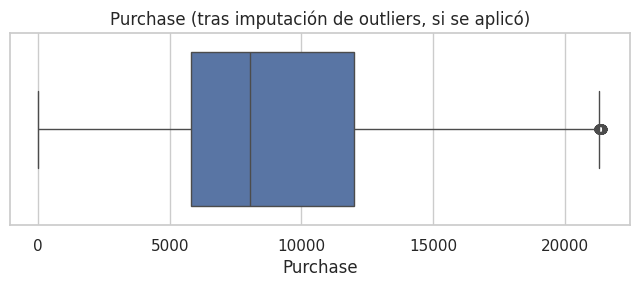

In [ ]:
# función para detectar outliers por IQR y opcionalmente imputar por mediana
def tratar_outliers_iqr(df_local, columna, imputar=True):
    """Detecta outliers por IQR y, si imputar=True, reemplaza outliers por la mediana sin outliers."""
    s = df_local[columna].dropna()                       # serie sin nulos
    q1 = s.quantile(0.25)                                # primer cuartil
    q3 = s.quantile(0.75)                                # tercer cuartil
    iqr = q3 - q1                                        # rango intercuartílico
    lim_inf = q1 - 1.5 * iqr                             # límite inferior
    lim_sup = q3 + 1.5 * iqr                             # límite superior
    mask_out = (df_local[columna] < lim_inf) | (df_local[columna] > lim_sup)  # máscara outliers
    n_out = mask_out.sum()                               # contar outliers
    med_sin_out = s[(s >= lim_inf) & (s <= lim_sup)].median()  # mediana sin outliers
    if imputar:
        df_local.loc[mask_out, columna] = med_sin_out    # reemplazar outliers por mediana
    return {'n_outliers': int(n_out), 'lim_inf': lim_inf, 'lim_sup': lim_sup, 'mediana_sin_out': med_sin_out}

# aplicar a 'Purchase' si existe
outliers_info = {}
if 'Purchase' in df_proc.columns:
    out_info = tratar_outliers_iqr(df_proc, 'Purchase', imputar=True)  # imputar outliers de Purchase
    outliers_info['Purchase'] = out_info
    print("Resultados para 'Purchase':", out_info)
else:
    print("Columna 'Purchase' no encontrada; no se procesaron outliers automáticos.")

# mostrar boxplot actualizado de Purchase
if 'Purchase' in df_proc.columns:
    plt.figure(figsize=(8,2.5))
    sns.boxplot(x=df_proc['Purchase'])
    plt.title('Purchase (tras imputación de outliers, si se aplicó)')
    plt.show()

La caja central muestra el rango intercuartílico (IQR), donde se concentra la mayoría de los datos de compra. La línea dentro de la caja corresponde a la mediana (~8038). Los bigotes indican el rango esperado de los datos sin considerar los outliers (desde aproximadamente 0 hasta 21,400). Se detectaron 2,677 valores atípicos que fueron tratados mediante imputación por la mediana.

**7. Exploración descriptiva: univariado**

El análisis univariado examina cada variable de forma individual. Se emplean medidas estadísticas (media, mediana, moda, desviación estándar) y representaciones gráficas como histogramas o diagramas de caja. Esto permite entender la distribución de los datos, detectar valores atípicos y conocer la tendencia central y dispersión de las variables. La interpretación de estos resultados facilita una primera comprensión de los patrones básicos presentes en el dataset.  

### Distribución de montos (Purchase)

count    550068.00
mean       9189.99
std        4927.50
min          12.00
25%        5823.00
50%        8038.00
75%       12007.00
max       21399.00
Name: Purchase, dtype: float64


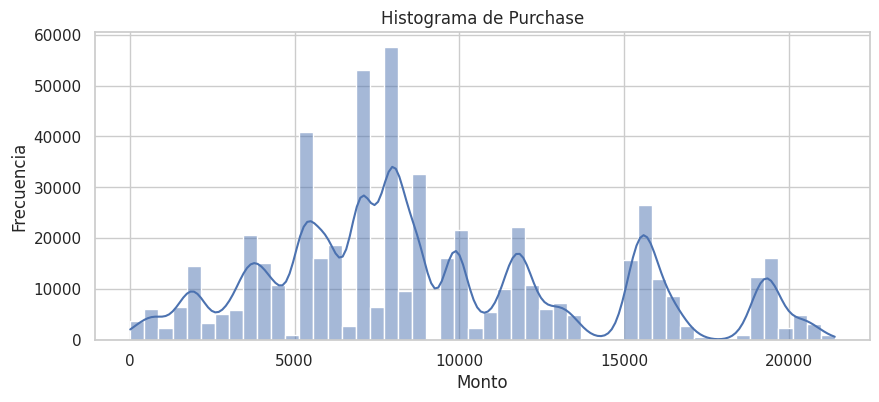

### Distribución de `Gender`

,count
Gender,
M,414259
F,135809


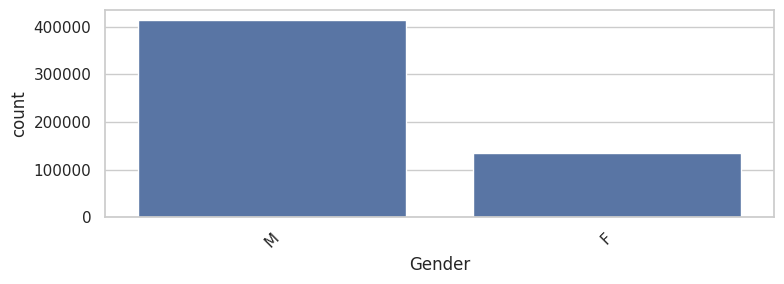

### Distribución de `Age`

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


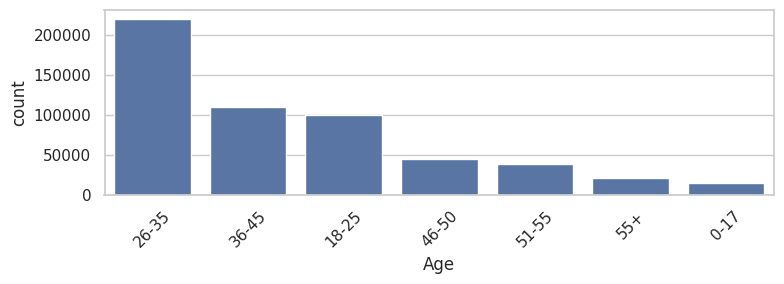

### Distribución de `City_Category`

,count
City_Category,
B,231173
C,171175
A,147720


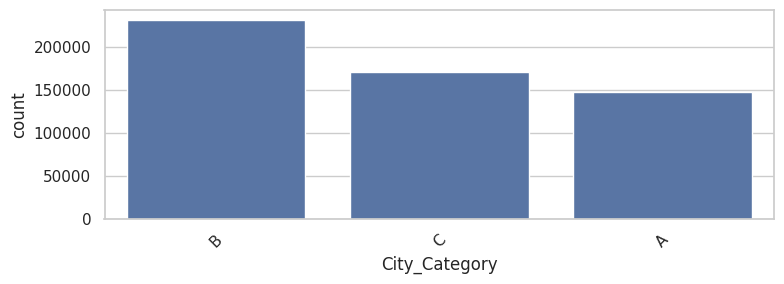

### Distribución de `Marital_Status`

,count
Marital_Status,
0,324731
1,225337


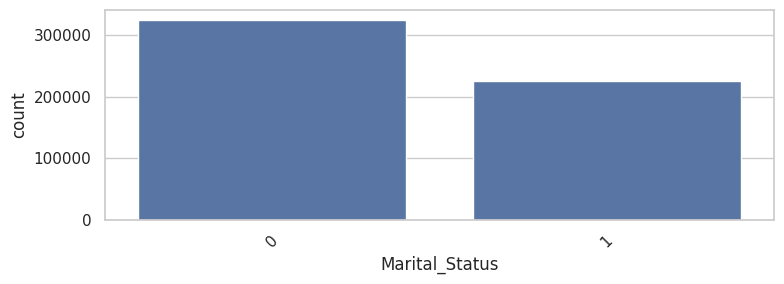

In [ ]:
# 7.1 Distribución de Purchase
if 'Purchase' in df_proc.columns:
    display(Markdown("### Distribución de montos (Purchase)"))
    print(df_proc['Purchase'].describe().round(2))      # estadísticas
    plt.figure(figsize=(10,4))
    sns.histplot(df_proc['Purchase'], bins=50, kde=True) # histograma con KDE
    plt.title('Histograma de Purchase')
    plt.xlabel('Monto')                                 # etiqueta eje x
    plt.ylabel('Frecuencia')                            # etiqueta eje y
    plt.show()

# 7.2 Variables categóricas frecuentes (ejemplos)
candidatas_cat = [c for c in ['Gender','Age','City_Category','StayInCurrentCityYears','Marital_Status'] if c in df_proc.columns]
for col in candidatas_cat:
    display(Markdown(f"### Distribución de `{col}`"))  # subtítulo
    display(df_proc[col].value_counts().head(20))      # mostrar conteos top20
    plt.figure(figsize=(8,3))
    sns.countplot(x=col, data=df_proc, order=df_proc[col].value_counts().index)  # gráfico de barras
    plt.xticks(rotation=45)                            # rotar etiquetas si hace falta
    plt.tight_layout()                                 # ajuste automático
    plt.show()

### Obversaciones de los gráficos
**Histograma de Purchase**: El gráfico muestra la distribución de los montos de compra. Se observa que los valores se concentran principalmente en un rango cercano a los 8,000, con variaciones que se extienden hasta aproximadamente los 21,000. La línea suavizada (KDE) permite identificar varios picos, lo que indica que las compras presentan diferentes grupos de frecuencia. Esto refleja una dispersión amplia y la existencia de montos de compra menos comunes en los extremos.

**Distribución de Gender**: La mayoría de los compradores son hombres (75%), mientras que las mujeres representan el 25%.

**Distribución de Age**: Predominan los clientes de 26–35 años, seguidos por los de 36–45 y 18–25. Esto indica que la base de clientes está compuesta principalmente por adultos jóvenes.

**Distribución de City_Category**: La mayor proporción de clientes proviene de ciudades tipo B, luego C y finalmente A.

**Distribución de Marital_Statsu**: La mayoría de los clientes no están casados (59%), mientras que los casados representan el 41%.


**8. Bivariado: relaciones entre variables**

En esta sección se analiza la relación entre 2 variables a la vez. Se utilizan gráficos de dispersión, tablas de contingencia y medidas de correlación para evaluar la fuerza y el sentido de la asociación entre variables. El objetivo es identificar dependencias, tendencias lineales o patrones de comportamiento conjunto. Por ejemplo, un coeficiente de correlación positivo y cercano a 1 indica una relación directa fuerte entre ambas variables.  


### Purchase según género

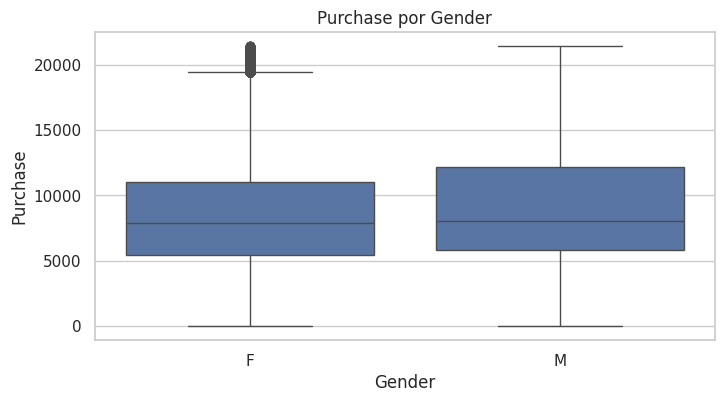

### Purchase según rango etario (Age)

/tmp/ipython-input-1290838995.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  order_age = list(df_proc['Age'].cat.categories) if pd.api.types.is_categorical_dtype(df_proc['Age']) else sorted(df_proc['Age'].unique(), key=str)  # intentar obtener orden


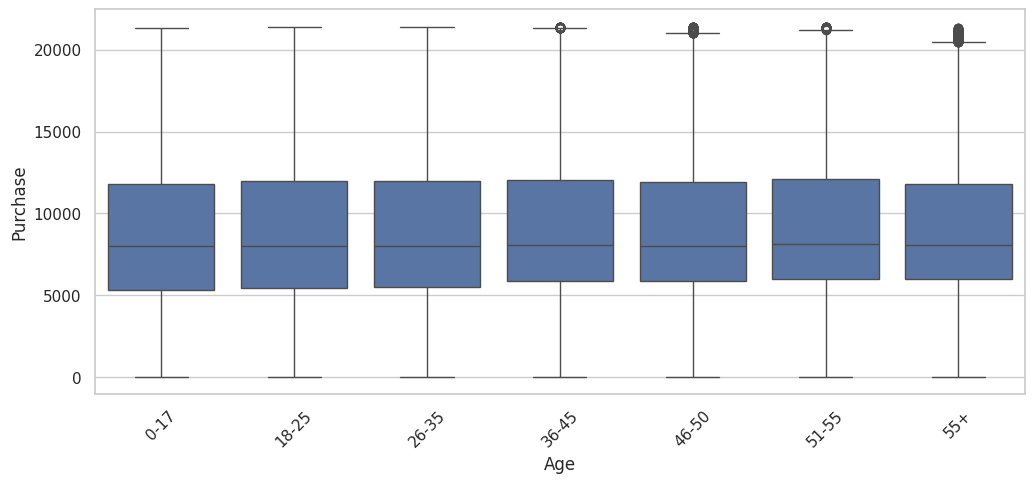

### Matriz de correlación (variables numéricas)

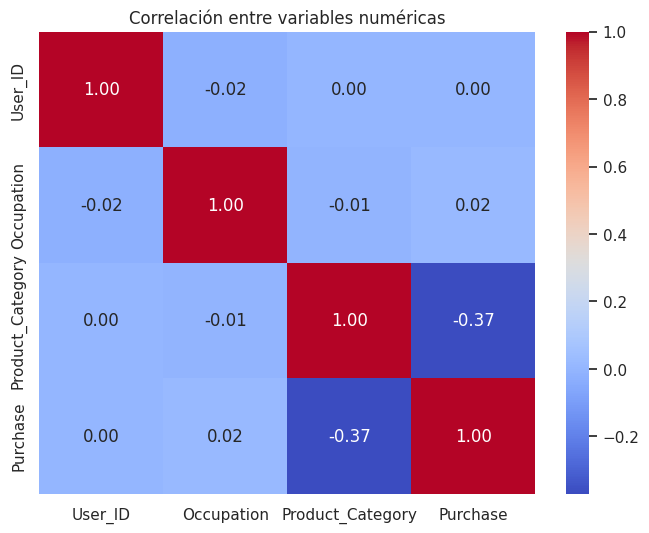

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.00,-0.02,0.00,0.00
Occupation,-0.02,1.00,-0.01,0.02
Product_Category,0.00,-0.01,1.00,-0.37
Purchase,0.00,0.02,-0.37,1.00


No se detectó columna de fecha adecuada o falta 'Purchase' para serie temporal.


In [ ]:
# 8.1 Purchase por Gender (si existen ambas)
if 'Purchase' in df_proc.columns and 'Gender' in df_proc.columns:
    display(Markdown("### Purchase según género"))
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_proc, x='Gender', y='Purchase')  # boxplot por género
    plt.title('Purchase por Gender')
    plt.show()

# 8.2 Purchase por Age (Age suele ser rango)
if 'Purchase' in df_proc.columns and 'Age' in df_proc.columns:
    display(Markdown("### Purchase según rango etario (Age)"))
    plt.figure(figsize=(12,5))
    order_age = list(df_proc['Age'].cat.categories) if pd.api.types.is_categorical_dtype(df_proc['Age']) else sorted(df_proc['Age'].unique(), key=str)  # intentar obtener orden
    sns.boxplot(data=df_proc, x='Age', y='Purchase', order=order_age)  # boxplot por edad
    plt.xticks(rotation=45)
    plt.show()

# 8.3 Correlaciones numéricas (heatmap)
num_df = df_proc.select_dtypes(include=[np.number])      # sub-DF con numéricas
if num_df.shape[1] > 1:
    display(Markdown("### Matriz de correlación (variables numéricas)"))
    corr = num_df.corr()                                 # matriz de correlación
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')  # heatmap con anotaciones
    plt.title('Correlación entre variables numéricas')
    plt.show()
    display(corr.round(2))                               # mostrar valores numéricos
else:
    print("No hay suficientes variables numéricas para matriz de correlación.")

# 8.4 Series temporales (si existe columna de fecha)
date_candidates = [c for c in df_proc.columns if 'date' in c.lower() or 'fecha' in c.lower()]
if date_candidates and 'Purchase' in df_proc.columns:
    date_col = date_candidates[0]                        # escoger primera columna encontrada
    df_proc[date_col] = pd.to_datetime(df_proc[date_col], errors='coerce')  # convertir safe
    ventas_diarias = df_proc.groupby(pd.Grouper(key=date_col, freq='D'))['Purchase'].sum().reset_index()  # agrupar por día
    display(Markdown("### Serie temporal: ventas agregadas por día"))
    plt.figure(figsize=(12,4))
    sns.lineplot(data=ventas_diarias, x=date_col, y='Purchase')
    plt.title('Ventas diarias agregadas')
    plt.show()
else:
    print("No se detectó columna de fecha adecuada o falta 'Purchase' para serie temporal.")

### Obversaciones de los gráficos
**Purchase por género (Gender)**:
El boxplot muestra la distribución de los montos de compra entre hombres (M) y mujeres (F). Ambos grupos presentan una dispersión amplia, con valores que llegan hasta alrededor de 20.000.

**Purchase por rango etario (Age)**:
El boxplot presenta la distribución de compras según los distintos rangos de edad (0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+). Todas las categorías muestran una amplitud considerable en los valores, con medianas similares y presencia de valores atípicos en los extremos superiores.

**Matriz de correlación (variables numéricas)**:
El mapa de calor incluye las variables User_ID, Occupation, Product_Category y Purchase. La correlación es baja entre la mayoría de las variables, destacando una correlación negativa moderada entre Product_Category y Purchase (-0.37).


9. **Análisis Multivariado: Cruces y segmentaciones básicas**

El análisis multivariado permite estudiar de manera simultánea la interacción de tres o más variables. Se aplican técnicas como matrices de correlación y mapas de calor para descubrir patrones complejos y relaciones ocultas que no son evidentes en análisis univariados o bivariados. Este enfoque proporciona una visión más profunda de la estructura interna de los datos y ayuda a determinar qué variables tienen mayor influencia en conjunto.  

In [ ]:
# promedio de Purchase por Product_Category y City_Category (si existen)
if 'Product_Category' in df_proc.columns and 'City_Category' in df_proc.columns and 'Purchase' in df_proc.columns:
    display(Markdown("### Promedio de Purchase por categoría de producto y ciudad"))
    resumen = df_proc.groupby(['Product_Category','City_Category'])['Purchase'].agg(['count','mean']).reset_index().sort_values('count', ascending=False)
    display(resumen.head(20).round(2))                 # mostrar top20 combinaciones
else:
    print("Faltan columnas para este cruce (Product_Category / City_Category).")

# top usuarios por gasto total si existe User_ID
if 'User_ID' in df_proc.columns and 'Purchase' in df_proc.columns:
    display(Markdown("### Usuarios con mayor gasto total"))
    top_users = df_proc.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False).head(10).reset_index()
    display(top_users)                                 # mostrar top10

### Promedio de Purchase por categoría de producto y ciudad

/tmp/ipython-input-961853612.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df_proc.groupby(['Product_Category','City_Category'])['Purchase'].agg(['count','mean']).reset_index().sort_values('count', ascending=False)


,Product_Category,City_Category,count,mean
13,5,B,64138,6168.59
1,1,B,58253,13435.93
22,8,B,47553,7454.79
2,1,C,47044,14233.97
14,5,C,44584,6458.68
12,5,A,42211,6117.84
0,1,A,35081,13047.18
23,8,C,34193,7721.21
21,8,A,32179,7328.07
31,11,B,10485,4612.28


### Usuarios con mayor gasto total

,User_ID,Purchase
0,1004277,10462249
1,1001680,8668993
2,1002909,7475257
3,1001941,6817493
4,1004448,6507810
5,1005831,6497168
6,1000424,6496375
7,1001015,6436683
8,1003391,6415321
9,1001181,6372420


Se realizó un cruce entre Product_Category y City_Category para calcular el promedio de compras. Los resultados muestran las combinaciones con mayor cantidad de registros y sus respectivos valores promedio. Entre ellas destacan categorías con altos montos medios de compra, en especial las categorías 1, 2 y 6 en distintas ciudades.

Además, se identificaron los usuarios con mayor gasto total, mostrando el top 10. El usuario con mayor gasto acumulado es el 1004277, seguido de otros con compras superiores a los 6 millones.

**11. Observaciones y recomendaciones**

In [ ]:
print("- Registros procesados:", df_proc.shape[0])           # filas procesadas
print("- Columnas:", df_proc.shape[1])                       # columnas
if 'Purchase' in df_proc.columns:
    print(f"- Purchase media: {df_proc['Purchase'].mean():.2f}  |  mediana: {df_proc['Purchase'].median():.2f}")  # media y mediana
    print(f"- Outliers imputados en Purchase (IQR) : {outliers_info.get('Purchase', {}).get('n_outliers', 'N/A')}")  # outliers info

print("\nRecomendaciones prácticas:")
print("1) Revisar manualmente los registros con montos extraordinarios antes de modelar.")  # recomendación 1
print("2) Crear variables temporales (mes, día semana) si hay fecha para capturar estacionalidad.")  # recomendación 2
print("3) Generar features por cliente (recencia, frecuencia, monto medio) para modelos o segmentación.")  # recomendación 3

- Registros procesados: 550068
- Columnas: 10
- Purchase media: 9189.99  |  mediana: 8038.00
- Outliers imputados en Purchase (IQR) : 2677

Recomendaciones prácticas:
1) Revisar manualmente los registros con montos extraordinarios antes de modelar.
2) Crear variables temporales (mes, día semana) si hay fecha para capturar estacionalidad.
3) Generar features por cliente (recencia, frecuencia, monto medio) para modelos o segmentación.


**Resumen del dataset procesado**
En total se procesaron 550.068 registros y 10 variables, sin valores faltantes y con outliers tratados.
El análisis exploratorio permitió identificar distribuciones clave, relaciones relevantes y patrones complejos que servirán como base sólida para la siguiente etapa de modelado predictivo o segmentación de clientes.

**Conclusión**


El análisis realizado permitió obtener una visión integral del dataset mediante distintas perspectivas:  
- **Univariado:** se identificaron distribuciones, valores atípicos y medidas de tendencia central que describen el comportamiento individual de las variables.  
- **Bivariado:** se analizaron relaciones entre pares de variables, detectando asociaciones relevantes y posibles dependencias lineales.  
- **Multivariado:** se exploraron interacciones más complejas, revelando patrones generales y variables con mayor influencia en los resultados.  